In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Double Q Learning

In [2]:
def DQL(alpha,e,total_episodes):

    gamma=0.98
    RewardsDQL=np.zeros(total_episodes)
    #We have 6 states. In 4 states...2 actions| in 2 states...1 action
    Q1= np.zeros((6,2))
    Q2= np.zeros((6,2))
    states=[0,1,2,3,4,5]

    # Describe the action space. 0-->left | 1-->right
    action_space_0=[1]
    action_space_5=[0]
    action_space_mid=[0,1]

    #Since no terminal state is given, we will run each episode for n steps.
    for episodes in range(total_episodes):

        steps=50
        state= np.random.randint(6)
        Tr=0

        while(steps>0):
            steps-=1


            #Choose an action in state S
            if(state==0):
                action= 1

            elif(state==5):
                action=0


            else:
                P=[e/2,e/2]
                temp= Q1[state]+Q2[state]
                greedy_arm=np.argmax(temp)
                P[greedy_arm]+= (1-e)
                action= np.random.choice(action_space_mid, p=P)


            #Find the next state and reward
            if(action==0):
                next_state= state-1
                reward=0

            else:
                next_state= state+1
                if(next_state==5):
                    reward= np.random.normal(-5,3)

                else:
                    reward=1

            #Find the best action in next_state as per the algorithm
            if(next_state==0):
                best_action_1= 1
                best_action_2= 1

            elif(next_state==5):
                best_action_1=0
                best_action_2=0


            else:
                best_action_1= np.argmax(Q1[next_state])
                best_action_2= np.argmax(Q2[next_state])


            #randomly update any 1 table (p=0.5,0.5 for both)
            table_num= np.random.choice([1,2], p=[1/2,1/2])

            if(table_num==1):
                Q1[state][action]= Q1[state][action] + (alpha*(reward + (gamma*Q2[next_state][best_action_1])-Q1[state][action]))

            else:
                Q2[state][action]= Q2[state][action] + (alpha*(reward + (gamma*Q1[next_state][best_action_2])-Q2[state][action]))

            Tr+= reward
            state=next_state
            
        RewardsDQL[episodes]=(Tr)
        
    return RewardsDQL
    

# DOUBLE Q Learning Twist

In [3]:
def DQLT(alpha,e,total_episodes):

    gamma=0.98
    RewardsDQL=np.zeros(total_episodes)
    #We have 6 states. In 4 states...2 actions| in 2 states...1 action
    Q1= np.zeros((6,2))
    Q2= np.zeros((6,2))
    states=[0,1,2,3,4,5]

    # Describe the action space. 0-->left | 1-->right
    action_space_0=[1]
    action_space_5=[0]
    action_space_mid=[0,1]

    #Since no terminal state is given, we will run each episode for n steps.
    for episodes in range(total_episodes):

        steps=50
        state= np.random.randint(6)
        Tr=0

        while(steps>0):
            steps-=1


            #Choose an action in state S
            if(state==0):
                action= 1

            elif(state==5):
                action=0


            else:
                P=[e/2,e/2]
                temp= Q1[state]+Q2[state]
                greedy_arm=np.argmax(temp)
                P[greedy_arm]+= (1-e)
                action= np.random.choice(action_space_mid, p=P)


            #Find the next state and reward
            if(action==0):
                next_state= state-1
                reward=0

            else:
                next_state= state+1
                if(next_state==5):
                    reward= np.random.normal(-5,3)

                else:
                    reward=1

            #Find the best action in next_state as per the algorithm
            if(next_state==0):
                best_action_1= 1
                best_action_2= 1

            elif(next_state==5):
                best_action_1=0
                best_action_2=0


            else:
                #Here we pick using e-greedy for table 1
                best_action_1= np.argmax(Q1[next_state])
                P_best=[e/2,e/2]
                P_best[best_action_1]+= (1-e)
                best_action_1= np.random.choice([0,1],p=P_best)
                
                
                best_action_2= np.argmax(Q2[next_state])



            #randomly update any 1 table (p=0.5,0.5 for both)
            table_num= np.random.choice([1,2], p=[1/2,1/2])

            if(table_num==1):
                Q1[state][action]= Q1[state][action] + (alpha*(reward + (gamma*Q2[next_state][best_action_1])-Q1[state][action]))

            else:
                Q2[state][action]= Q2[state][action] + (alpha*(reward + (gamma*Q1[next_state][best_action_2])-Q2[state][action]))

            Tr+= reward
            state= next_state
            
            
        RewardsDQL[episodes]=(Tr)
        
    return RewardsDQL
    

# Run the algorithm for whatever hyper parameters averaged over 50 runs.

## 1.

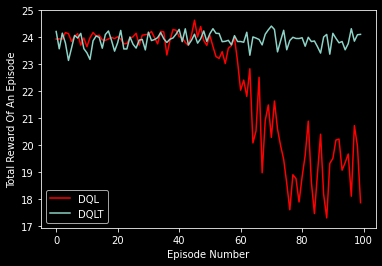

In [4]:
total_episodes=100
alpha=0.7
e=0.1
R=50
rewardsdql= np.zeros(total_episodes)
rewardsdqlt= np.zeros(total_episodes)

for runs in range(R):
    rewardsdql+= DQL(alpha,e,total_episodes)
    rewardsdqlt+= DQLT(alpha,e,total_episodes)
    
    print(runs, end='\r')
    
plt.style.use('dark_background')
plt.plot(rewardsdql/R, color='red', label='DQL')
plt.plot(rewardsdqlt/R, label='DQLT')
plt.ylabel('Total Reward Of An Episode')
plt.xlabel('Episode Number')
plt.legend()
plt.show()

## 2.

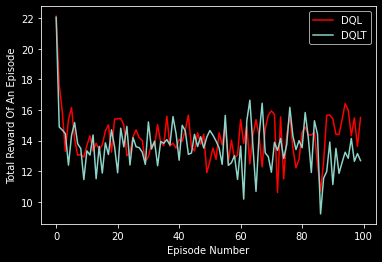

In [5]:
total_episodes=100
alpha=0.01
e=0.2
R=50
rewardsdql= np.zeros(total_episodes)
rewardsdqlt= np.zeros(total_episodes)

for runs in range(R):
    rewardsdql+= DQL(alpha,e,total_episodes)
    rewardsdqlt+= DQLT(alpha,e,total_episodes)
    
    print(runs, end='\r')
    
plt.style.use('dark_background')
plt.plot(rewardsdql/R, color='red', label='DQL')
plt.plot(rewardsdqlt/R, label='DQLT')
plt.ylabel('Total Reward Of An Episode')
plt.xlabel('Episode Number')
plt.legend()
plt.show()
    

## 3.

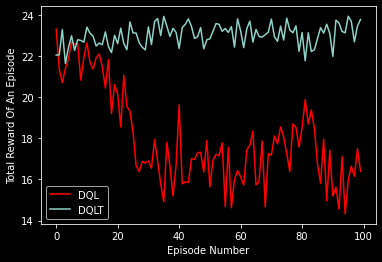

In [6]:
total_episodes=100
alpha=1
e=0.2
R=50
rewardsdql= np.zeros(total_episodes)
rewardsdqlt= np.zeros(total_episodes)

for runs in range(R):
    rewardsdql+= DQL(alpha,e,total_episodes)
    rewardsdqlt+= DQLT(alpha,e,total_episodes)
    
    print(runs, end='\r')
    
plt.style.use('dark_background')
plt.plot(rewardsdql/R, color='red', label='DQL')
plt.plot(rewardsdqlt/R, label='DQLT')
plt.ylabel('Total Reward Of An Episode')
plt.xlabel('Episode Number')
plt.legend()
plt.show()
    

## 4.

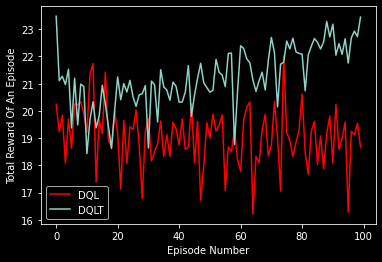

In [8]:
total_episodes=100
alpha=0.1
e=0.2
R=50
rewardsdql= np.zeros(total_episodes)
rewardsdqlt= np.zeros(total_episodes)

for runs in range(R):
    rewardsdql+= DQL(alpha,e,total_episodes)
    rewardsdqlt+= DQLT(alpha,e,total_episodes)
    
    print(runs, end='\r')
    
plt.style.use('dark_background')
plt.plot(rewardsdql/R, color='red', label='DQL')
plt.plot(rewardsdqlt/R, label='DQLT')
plt.ylabel('Total Reward Of An Episode')
plt.xlabel('Episode Number')
plt.legend()
plt.show()
    

In [9]:
## 5.

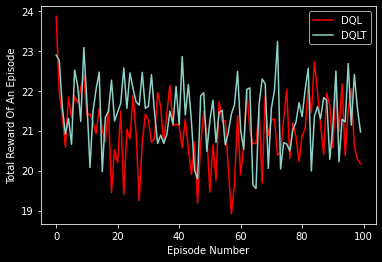

In [10]:
total_episodes=100
alpha=0.05
e=0.15
R=50
rewardsdql= np.zeros(total_episodes)
rewardsdqlt= np.zeros(total_episodes)

for runs in range(R):
    rewardsdql+= DQL(alpha,e,total_episodes)
    rewardsdqlt+= DQLT(alpha,e,total_episodes)
    
    print(runs, end='\r')
    
plt.style.use('dark_background')
plt.plot(rewardsdql/R, color='red', label='DQL')
plt.plot(rewardsdqlt/R, label='DQLT')
plt.ylabel('Total Reward Of An Episode')
plt.xlabel('Episode Number')
plt.legend()
plt.show()